In [1]:
# Load packages for data analysis
import pandas as pd
from tableone import TableOne
import matplotlib.pyplot as plt

# Load packages for Big Query 
from google.cloud import bigquery
import os

### Set-up

**Set-up: GCP interface** 

Run before querying to setup Big Query

In [2]:
# Define configurations for Big Query - Stride Datalake
project_id = 'som-nero-phi-boussard' # Location of stride datalake
db = "som-nero-phi-boussard.stride_datalake" # Define the database
msc = "som!-nero-phi-boussard.MSc_ACU_Oncology"
es = "som-nero-phi-boussard.ES_ACU_Oncology"
client = bigquery.Client(project=project_id) # Set project to project_id
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/path/to/your/credentials.json'
os.environ['GCLOUD_PROJECT'] = "som-nero-phi-boussard" # specify environment
db = "som-nero-phi-boussard" # Define the database

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/google/auth/_default.py:83: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


**Set-up: GCP data table creation in Big Query**

In [3]:
# 1) Specify the job config to properly read the file
job_config = bigquery.LoadJobConfig()
job_config.autodetect = True # determines the datatype of the variable
job_config.write_disposition = 'WRITE_TRUNCATE'
job_config.max_bad_records = 1 # allow 5 bad records; 

# Read schema from JSON
# job_config.schema = self.bq_client.schema_from_json(
# f"{json_schema_dir}/{custom_mapping_table}.json")

# 2) Specify destination
# destination = f"som-nero-phi-boussard.MSc_ACU_Oncology.[COHORT NAME]"

# 3) Save file ob Big Query, using result from so far; client is specified above - implemented in the file 
# load_job = client.load_table_from_dataframe(dataframe = chemo_tx_dd,                                  
#                                                     destination = destination,
#                                                     job_config = job_config)

# Run the job:
# load_job.result()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Get cohort patient table

In [4]:
sql_query = f""" SELECT * FROM {es}.cohort_p1_text"""
cohort = (client.query(sql_query)).to_dataframe()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
cohort

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PAT_DEID,HOSP_ADMSN_TIME,CHE_TX_DATE
0,1770802,2020-02-07 20:54:00,2020-01-16 00:00:00
1,3945576,2020-02-01 09:14:00,2020-01-24 00:00:00
2,1045640,2016-02-15 20:12:00,2016-02-08 00:00:00
3,1289918,2016-04-15 23:13:00,2016-03-16 00:00:00
4,2766580,2016-04-13 17:43:00,2016-03-24 00:00:00
...,...,...,...
1748,538184,2015-02-13 13:13:00,2015-01-16 08:59:00
1749,1253627,2019-03-14 16:38:00,2019-03-08 23:59:00
1750,3456627,2018-11-12 13:20:00,2018-10-17 09:59:00
1751,3316652,2014-06-06 19:31:00,2014-06-05 23:59:00


## Build characterization table

In [7]:
sql_query = f""" SELECT * FROM {es}.cohort_p1_large"""
cohort_p1_large = (client.query(sql_query)).to_dataframe()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Get the demographic information for our cohort patient 
cohort_p1_large_symp = pd.merge(cohort["PAT_DEID"], cohort_p1_large, how="left", on = ['PAT_DEID'])

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
sql_query = f""" SELECT * FROM {es}.cohort_p1_class"""
cohort_p1_class = (client.query(sql_query)).to_dataframe()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
cohort_p1_large_class = pd.merge(cohort_p1_large, cohort_p1_class[['PAT_DEID', 'AE_CLASS']], how="inner", on = ['PAT_DEID'])

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Build df ready for characterization**

In [12]:
# Race 
class_characterization = cohort_p1_large_class.replace(["Other", "Hawaiian or Pacific Islander", "Ethnic group not given - patient refused", "Native American", "Unknown"], ["Other", "Other", "Other", "Other", "Other"])
class_characterization.RACE.value_counts()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


White    1610
Other     825
Asian     798
Black     134
Name: RACE, dtype: int64

In [13]:
# Ethnic Group 
class_characterization = class_characterization.replace(["Patient Refused", "Unknown"], ["Other", "Other"])
class_characterization.ETHNIC_GROUP.value_counts() 

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Non-Hispanic/Non-Latino    2780
Hispanic/Latino             564
Other                        23
Name: ETHNIC_GROUP, dtype: int64

In [16]:
# Specify destination for storing dataframe
destination = f"som-nero-phi-boussard.ES_ACU_Oncology.class_characterization"

# Save file to Big Query
load_job = client.load_table_from_dataframe(dataframe = class_characterization,                                  
                                                   destination = destination,
                                                   job_config = job_config)

# Run the job:
load_job.result()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LoadJob<project=som-nero-phi-boussard, location=US, id=297681a9-561c-474b-be1c-3a34c2d6e6cb>

### Build characterization table of the target cohort stratified by CLASSES

In [17]:
# columns to summarize
columns = ['SEX', "AGE_AT_DX", "RACE", "ETHNIC_GROUP", "CANCER_GROUP", "STAGE_FOUR", "INSURANCE_PAYOR"]

# columns containing categorical variables
categorical = ['SEX', "RACE", "ETHNIC_GROUP", "CANCER_GROUP", "STAGE_FOUR", "INSURANCE_PAYOR"]

# limit the binary variable "death" to a single row
limit = {'SEX': 1}

# set the order of the categorical variables
order = {"RACE": ["Asian", "White", "Black", "Other"],
         "ETHNIC_GROUP": ["Hispanic/Latino", "Non-Hispanic/Non-Latino", "Other"],
         "INSURANCE_PAYOR": ["MEDICARE", "PRIVATE", "MediCal_MEDICAID"],
         "STAGE_FOUR": [1.0, 2.0, 3.0, 4.0],
         "CANCER_GROUP": ["hematopoietic_lymph", "hepatobiliary_pancreas", "gastrointestinal", "breast", 
                        "lung_thoracic", "gynecologic", "head_neck", "genitourinary", "sarcoma", "skin", "neurologic", "prostate"]
        }

# alternative labels
labels={'AGE_AT_DX': 'AGE'}

# non-normal variables
#nonnormal = ["AGE_AT_DX"]

# optionally, a categorical variable for stratification
groupby = ['AE_CLASS']

table1 = TableOne(class_characterization, columns=columns, categorical=categorical, groupby=groupby,
                   label_suffix=True, limit=limit, order=order, overall=False, missing=False, labels=labels)

table1

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/tableone/tableone.py:225: DeprecationWarning: The labels argument is deprecated; use rename instead.
  warnings.warn("The labels argument is deprecated; use "
/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/tableone/tableone.py:1458: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, _ in levelcounts.iteritems():


Grouped by AE_CLASS                                       
                                                           CLASS_1      CLASS_2      CLASS_3      CLASS_4
n                                                             1140          773          574          884
SEX, n (%)             Female                           600 (52.6)   433 (56.0)   265 (46.2)   426 (48.2)
AGE, mean (SD)                                         56.4 (15.5)  56.3 (15.8)  56.0 (16.1)  57.6 (15.7)
RACE, n (%)            Asian                            275 (24.1)   178 (23.1)   120 (20.9)   225 (25.5)
                       White                            536 (47.1)   369 (47.8)   279 (48.7)   426 (48.2)
                       Black                              46 (4.0)     30 (3.9)     23 (4.0)     35 (4.0)
                       Other                            282 (24.8)   195 (25.3)   151 (26.4)   197 (22.3)
ETHNIC_GROUP, n (%)    Hispanic/Latino                  201 (17.6)   130 (16.8)   107 (18.7)   126 (14.3)
                       Non-Hispanic/Non-Latino          932 (81.8)   637 (82.5)   459 (80.1)   752 (85.2)
                       Other                               6 (0.5)      5 (0.6)      7 (1.2)      5 (0.6)
CANCER_GROUP, n (%)    hematopoietic_lymph              211 (18.5)   146 (18.9)   166 (28.9)   213 (24.1)
                       hepatobiliary_pancreas           156 (13.7)    95 (12.3)    61 (10.6)   102 (11.5)
                       gastrointestinal                 122 (10.7)   103 (13.3)     48 (8.4)     82 (9.3)
                       breast                           127 (11.1)    89 (11.5)     38 (6.6)   100 (11.3)
                       lung_thoracic                    119 (10.4)     59 (7.6)     57 (9.9)   117 (13.2)
                       gynecologic                        95 (8.3)     70 (9.1)     35 (6.1)     45 (5.1)
                       head_neck                          80 (7.0)     56 (7.2)     40 (7.0)     68 (7.7)
                       genitourinary                      85 (7.5)     53 (6.9)     45 (7.8)     60 (6.8)
                       sarcoma                            77 (6.8)     56 (7.2)     53 (9.2)     50 (5.7)
                       skin                               33 (2.9)     21 (2.7)     13 (2.3)     17 (1.9)
                       neurologic                         20 (1.8)     18 (2.3)     13 (2.3)     19 (2.1)
                       prostate                           15 (1.3)      7 (0.9)      5 (0.9)     11 (1.2)
STAGE_FOUR, n (%)      1.0                              110 (18.8)    80 (19.9)    53 (20.0)    90 (18.0)
                       2.0                              106 (18.1)    81 (20.1)    42 (15.8)    82 (16.4)
                       3.0                              104 (17.7)    70 (17.4)    40 (15.1)    81 (16.2)
                       4.0                              266 (45.4)   172 (42.7)   130 (49.1)   247 (49.4)
INSURANCE_PAYOR, n (%) MEDICARE                         265 (54.9)   188 (57.1)   147 (57.0)   230 (59.0)
                       PRIVATE                          167 (34.6)   115 (35.0)    87 (33.7)   128 (32.8)
                       MediCal_MEDICAID                  51 (10.6)     26 (7.9)     24 (9.3)     32 (8.2)

### Build characterization table of the target cohort

In [21]:
# target cohort 
cohort_characterization = class_characterization.copy()
del cohort_characterization["AE_CLASS"]
cohort_characterization.drop_duplicates(inplace=True)

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
cohort_characterization.shape

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1753, 15)

In [23]:
# Specify destination for storing dataframe
destination = f"som-nero-phi-boussard.ES_ACU_Oncology.cohort_characterization"

# Save file to Big Query
load_job = client.load_table_from_dataframe(dataframe = cohort_characterization,                                  
                                                   destination = destination,
                                                   job_config = job_config)

# Run the job:
load_job.result()

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LoadJob<project=som-nero-phi-boussard, location=US, id=a7279df7-48f1-410b-8a17-ffc84ddabfa4>

In [24]:
table2 = TableOne(cohort_characterization, columns=columns, categorical=categorical, 
                   label_suffix=True, limit=limit, order=order, missing=False, labels=labels)

table2

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/tableone/tableone.py:225: DeprecationWarning: The labels argument is deprecated; use rename instead.
  warnings.warn("The labels argument is deprecated; use "
/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/tableone/tableone.py:1458: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, _ in levelcounts.iteritems():


Overall
n                                                      1753
SEX, n (%)             Male                      883 (50.4)
AGE, mean (SD)                                  56.9 (15.8)
RACE, n (%)            Asian                     418 (23.9)
                       White                     854 (48.7)
                       Black                       67 (3.8)
                       Other                     413 (23.6)
ETHNIC_GROUP, n (%)    Hispanic/Latino           283 (16.2)
                       Non-Hispanic/Non-Latino  1458 (83.2)
                       Other                       11 (0.6)
CANCER_GROUP, n (%)    hematopoietic_lymph       377 (21.5)
                       hepatobiliary_pancreas    203 (11.6)
                       gastrointestinal          181 (10.3)
                       breast                    191 (10.9)
                       lung_thoracic             184 (10.5)
                       gynecologic                123 (7.0)
                       head_neck                  136 (7.8)
                       genitourinary              131 (7.5)
                       sarcoma                    117 (6.7)
                       skin                        46 (2.6)
                       neurologic                  42 (2.4)
                       prostate                    22 (1.3)
STAGE_FOUR, n (%)      1.0                       176 (18.5)
                       2.0                       168 (17.7)
                       3.0                       167 (17.6)
                       4.0                       438 (46.2)
INSURANCE_PAYOR, n (%) MEDICARE                  437 (57.1)
                       PRIVATE                   257 (33.6)
                       MediCal_MEDICAID            71 (9.3)

**Save characterization table**

In [64]:
# Save to Excel
fn1 = 'tableone.xlsx'
table1.to_excel(fn1)

# Save table to LaTeX
fn2 = 'tableone.tex'
table1.to_latex(fn2)

# Save table to HTML
fn3 = 'tableone.html'
table1.to_html(fn3)

# Save table to HTML
fn4 = 'tableone.csv'
table1.to_csv(fn4)

/Users/eliasaquand/miniforge3/envs/env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-5abfd0e89567>:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table1.to_latex(fn2)


### Below is to do it manually, without using TableOne

#### Sex

In [13]:
cohort_p1_large_symp.SEX.value_counts()

Male      883
Female    870
Name: SEX, dtype: int64

In [14]:
cohort_p1_large_class.groupby(["SEX", "AE_CLASS"])["PAT_DEID"].count()

SEX     AE_CLASS
Female  CLASS_1     600
        CLASS_2     433
        CLASS_3     265
        CLASS_4     426
Male    CLASS_1     540
        CLASS_2     340
        CLASS_3     309
        CLASS_4     458
Name: PAT_DEID, dtype: int64

**Ethnic group**

In [15]:
cohort_p1_large_symp.ETHNIC_GROUP.value_counts()

Non-Hispanic/Non-Latino    1458
Hispanic/Latino             283
Patient Refused               9
Unknown                       2
Name: ETHNIC_GROUP, dtype: int64

In [16]:
cohort_p1_large_class.groupby(["ETHNIC_GROUP", "AE_CLASS"])["PAT_DEID"].count()

ETHNIC_GROUP             AE_CLASS
Hispanic/Latino          CLASS_1     201
                         CLASS_2     130
                         CLASS_3     107
                         CLASS_4     126
Non-Hispanic/Non-Latino  CLASS_1     932
                         CLASS_2     637
                         CLASS_3     459
                         CLASS_4     752
Patient Refused          CLASS_1       4
                         CLASS_2       5
                         CLASS_3       6
                         CLASS_4       5
Unknown                  CLASS_1       2
                         CLASS_3       1
Name: PAT_DEID, dtype: int64

**Race**

In [17]:
cohort_p1_large_symp.RACE.value_counts()

White                                       854
Asian                                       418
Other                                       364
Black                                        67
Hawaiian or Pacific Islander                 26
Ethnic group not given - patient refused      9
Native American                               8
Unknown                                       6
Name: RACE, dtype: int64

In [18]:
cohort_p1_large_class.groupby(["RACE", "AE_CLASS"])["PAT_DEID"].count()

RACE                                      AE_CLASS
Asian                                     CLASS_1     275
                                          CLASS_2     178
                                          CLASS_3     120
                                          CLASS_4     225
Black                                     CLASS_1      46
                                          CLASS_2      30
                                          CLASS_3      23
                                          CLASS_4      35
Ethnic group not given - patient refused  CLASS_1       5
                                          CLASS_2       5
                                          CLASS_3       5
                                          CLASS_4       6
Hawaiian or Pacific Islander              CLASS_1      18
                                          CLASS_2      11
                                          CLASS_3       9
                                          CLASS_4      12
Native American      

**Age**

In [19]:
cohort_p1_large_symp.BIN_AGE.value_counts()

60<age<70    438
50<age<60    377
70<age<80    324
age<40       279
40<age<50    245
age>80        90
Name: BIN_AGE, dtype: int64

In [20]:
cohort_p1_large_class.groupby(["BIN_AGE", "AE_CLASS"])["PAT_DEID"].count()

BIN_AGE    AE_CLASS
40<age<50  CLASS_1     168
           CLASS_2     108
           CLASS_3      79
           CLASS_4     121
50<age<60  CLASS_1     241
           CLASS_2     174
           CLASS_3     128
           CLASS_4     187
60<age<70  CLASS_1     297
           CLASS_2     184
           CLASS_3     144
           CLASS_4     219
70<age<80  CLASS_1     190
           CLASS_2     149
           CLASS_3      95
           CLASS_4     179
age<40     CLASS_1     190
           CLASS_2     128
           CLASS_3     100
           CLASS_4     130
age>80     CLASS_1      54
           CLASS_2      30
           CLASS_3      28
           CLASS_4      48
Name: PAT_DEID, dtype: int64

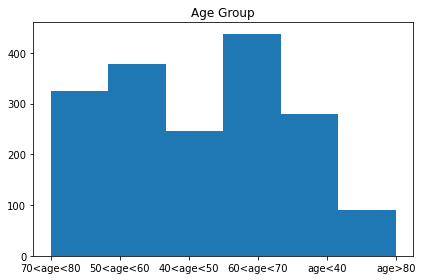

In [21]:
cohort_p1_large_symp.BIN_AGE.hist(bins=6, grid=False)
plt.title('Age Group')
plt.tight_layout()
plt.savefig('age.png', bbox_inches='tight')

**Depressed**

In [22]:
cohort_p1_large_symp.DEPRESSED.value_counts()

0.0    1300
1.0     453
Name: DEPRESSED, dtype: int64

In [23]:
cohort_p1_large_class.groupby(["DEPRESSED", "AE_CLASS"])["PAT_DEID"].count()

DEPRESSED  AE_CLASS
0.0        CLASS_1     815
           CLASS_2     567
           CLASS_3     412
           CLASS_4     672
1.0        CLASS_1     325
           CLASS_2     206
           CLASS_3     162
           CLASS_4     212
Name: PAT_DEID, dtype: int64

**Insurance payor**

In [24]:
cohort_p1_large_symp.INSURANCE_PAYOR.value_counts()

MEDICARE            437
PRIVATE             257
MediCal_MEDICAID     71
Name: INSURANCE_PAYOR, dtype: int64

In [25]:
cohort_p1_large_class.groupby(["INSURANCE_PAYOR", "AE_CLASS"])["PAT_DEID"].count()

INSURANCE_PAYOR   AE_CLASS
MEDICARE          CLASS_1     265
                  CLASS_2     188
                  CLASS_3     147
                  CLASS_4     230
MediCal_MEDICAID  CLASS_1      51
                  CLASS_2      26
                  CLASS_3      24
                  CLASS_4      32
PRIVATE           CLASS_1     167
                  CLASS_2     115
                  CLASS_3      87
                  CLASS_4     128
Name: PAT_DEID, dtype: int64

In [26]:
cohort_p1_large_class[cohort_p1_large_class["INSURANCE_PAYOR"].isnull()]["AE_CLASS"].value_counts()

CLASS_1    657
CLASS_4    494
CLASS_2    444
CLASS_3    316
Name: AE_CLASS, dtype: int64

**Cancer Stage**

In [27]:
cohort_p1_large_symp.STAGE_FOUR.value_counts()

4.0    438
1.0    176
2.0    168
3.0    167
Name: STAGE_FOUR, dtype: int64

In [28]:
cohort_p1_large_class.groupby(["STAGE_FOUR", "AE_CLASS"])["PAT_DEID"].count()

STAGE_FOUR  AE_CLASS
1.0         CLASS_1     110
            CLASS_2      80
            CLASS_3      53
            CLASS_4      90
2.0         CLASS_1     106
            CLASS_2      81
            CLASS_3      42
            CLASS_4      82
3.0         CLASS_1     104
            CLASS_2      70
            CLASS_3      40
            CLASS_4      81
4.0         CLASS_1     266
            CLASS_2     172
            CLASS_3     130
            CLASS_4     247
Name: PAT_DEID, dtype: int64

In [29]:
cohort_p1_large_class[cohort_p1_large_class["STAGE_FOUR"].isnull()]["AE_CLASS"].value_counts()

CLASS_1    554
CLASS_4    384
CLASS_2    370
CLASS_3    309
Name: AE_CLASS, dtype: int64

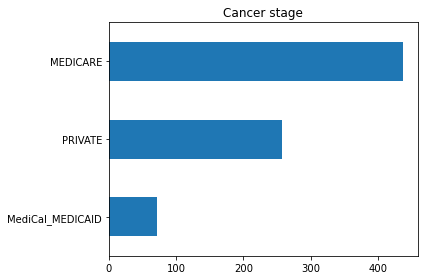

In [30]:
fig,ax = plt.subplots()
(cohort_p1_large_symp.INSURANCE_PAYOR.value_counts()[::-1]).plot(kind="barh", title="Cancer stage",ax=ax)
plt.tight_layout()
plt.savefig('cancer_stage.png', bbox_inches='tight')

In [32]:
cohort_p1_large_symp.AGE_AT_DX.value_counts()

64.0    58
63.0    50
51.0    45
54.0    44
73.0    43
        ..
87.0     2
94.0     2
91.0     2
89.0     1
93.0     1
Name: AGE_AT_DX, Length: 77, dtype: int64